# Bharat Intern Task -I

## Stock Prediction--TESLA

###  Import libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

###  read dataset 

In [6]:
df=pd.read_csv("TESLA.csv")
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-29,259.933319,264.500000,256.893341,260.436676,260.436676,62828700
1,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000
2,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200
3,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900
4,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [9]:
df.shape

(253, 6)

### Visualization

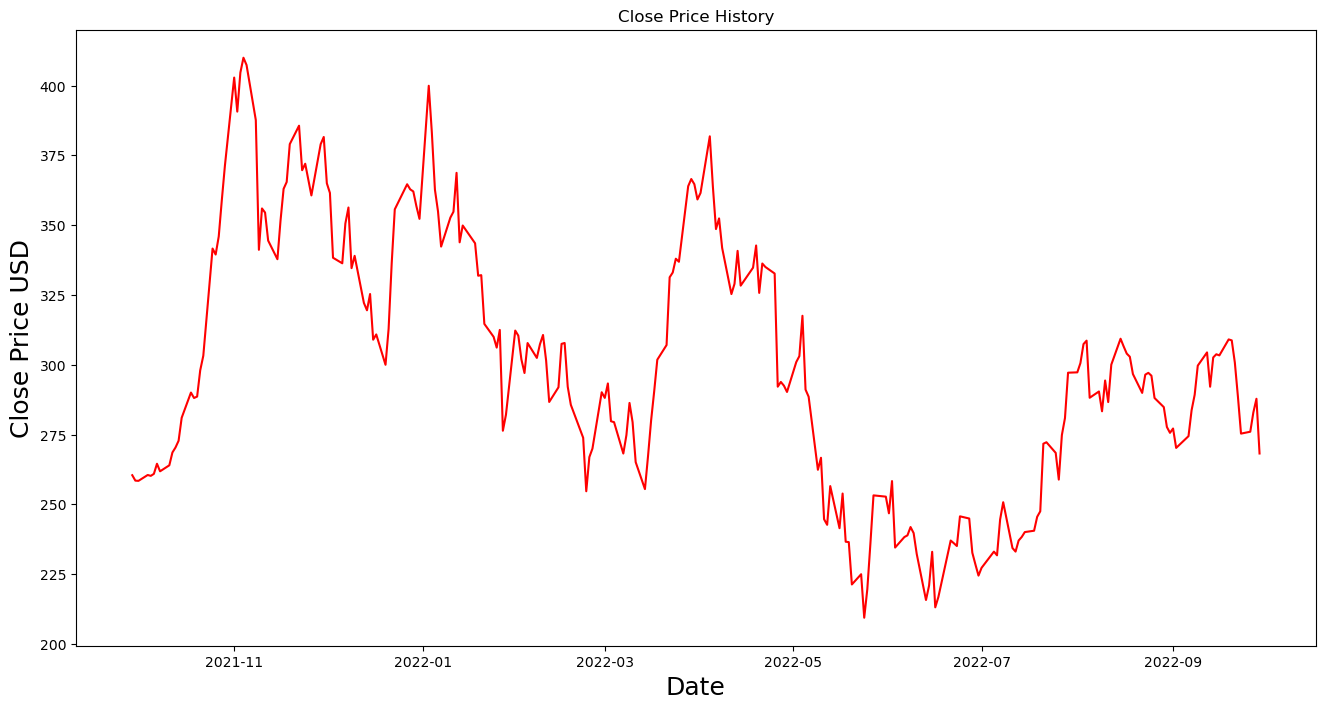

In [12]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.show()

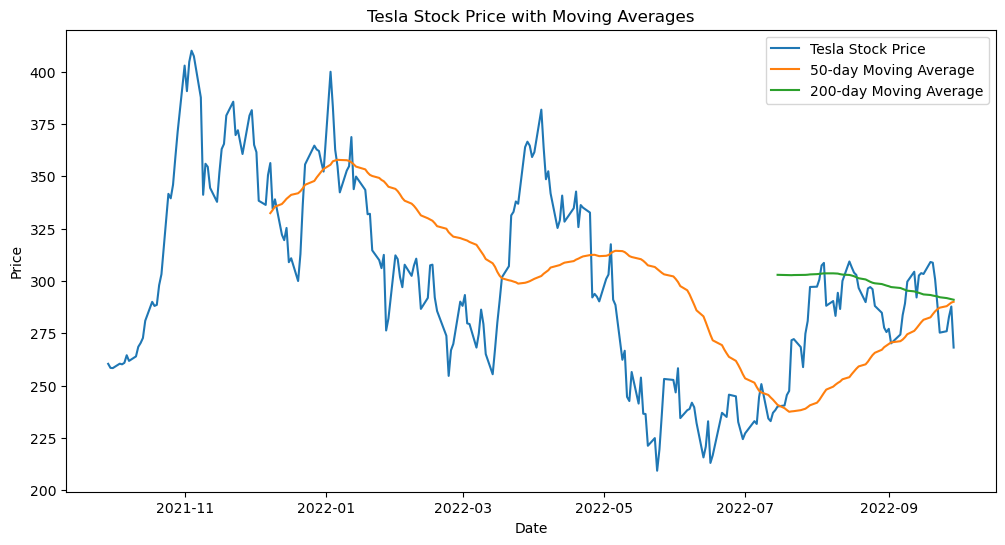

In [17]:
df.index = pd.to_datetime(df.index)
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Tesla Stock Price')
plt.plot(df.index, df['50_MA'], label='50-day Moving Average')
plt.plot(df.index, df['200_MA'], label='200-day Moving Average')
plt.legend()
plt.title('Tesla Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [18]:
data = df.filter(['Close'])
dataset = data.values #convert the data frame to a numpy array
training_data_len = math.ceil(len(dataset)*.8)  # number of rows to train the model on
training_data_len

203

### Model

In [43]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.25450771],
       [0.24481932],
       [0.24438723],
       [0.25487331],
       [0.25331109],
       [0.25690063],
       [0.27494812],
       [0.261454  ],
       [0.27217286],
       [0.29507268],
       [0.30397996],
       [0.31601167],
       [0.35707523],
       [0.40207733],
       [0.39237221],
       [0.39491484],
       [0.44177813],
       [0.4678354 ],
       [0.65924383],
       [0.64855829],
       [0.68084754],
       [0.74595763],
       [0.80737852],
       [0.96457004],
       [0.90376396],
       [0.97332776],
       [1.        ],
       [0.98700461],
       [0.88870793],
       [0.65698373],
       [0.73085169],
       [0.72347315],
       [0.67346901],
       [0.64018276],
       [0.70888238],
       [0.76584956],
       [0.77809716],
       [0.84569998],
       [0.87862062],
       [0.79911922],
       [0.81070211],
       [0.75406737],
       [0.84558374],
       [0.85849606],
       [0.77580389],
       [0.75852093],
       [0.64280846],
       [0.632

In [22]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.25450771, 0.24481932, 0.24438723, 0.25487331, 0.25331109,
       0.25690063, 0.27494812, 0.261454  , 0.27217286, 0.29507268,
       0.30397996, 0.31601167, 0.35707523, 0.40207733, 0.39237221,
       0.39491484, 0.44177813, 0.4678354 , 0.65924383, 0.64855829,
       0.68084754, 0.74595763, 0.80737852, 0.96457004, 0.90376396,
       0.97332776, 1.        , 0.98700461, 0.88870793, 0.65698373,
       0.73085169, 0.72347315, 0.67346901, 0.64018276, 0.70888238,
       0.76584956, 0.77809716, 0.84569998, 0.87862062, 0.79911922,
       0.81070211, 0.75406737, 0.84558374, 0.85849606, 0.77580389,
       0.75852093, 0.64280846, 0.63290403, 0.70393024, 0.73253014,
       0.62424596, 0.64623186, 0.56211045, 0.54898208, 0.57803066,
       0.49648521, 0.50587448, 0.45164939, 0.51577891, 0.63267141])]
[0.7292728885224198]



In [23]:
x_train,y_train = np.array(x_train), np.array(y_train)

In [24]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(143, 60, 1)

In [25]:
model =Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))

In [26]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [27]:
model.fit(x_train,y_train, batch_size=1, epochs=5)

Epoch 1/5
143/143 [==============================] - 10s 31ms/step - loss: 0.0263
Epoch 2/5
143/143 [==============================] - 5s 31ms/step - loss: 0.0128
Epoch 3/5
143/143 [==============================] - 5s 33ms/step - loss: 0.0105
Epoch 4/5
143/143 [==============================] - 5s 32ms/step - loss: 0.0113
Epoch 5/5
143/143 [==============================] - 5s 32ms/step - loss: 0.0083


In [28]:
test_data= scaled_data[training_data_len-60:, :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [29]:
x_test = np.array(x_test)

In [30]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(50, 60, 1)

In [31]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2/2 [==============================] - 1s 16ms/step


In [32]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.6541466519531218

C:\Users\yoges\AppData\Local\Temp\ipykernel_24708\4225241223.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


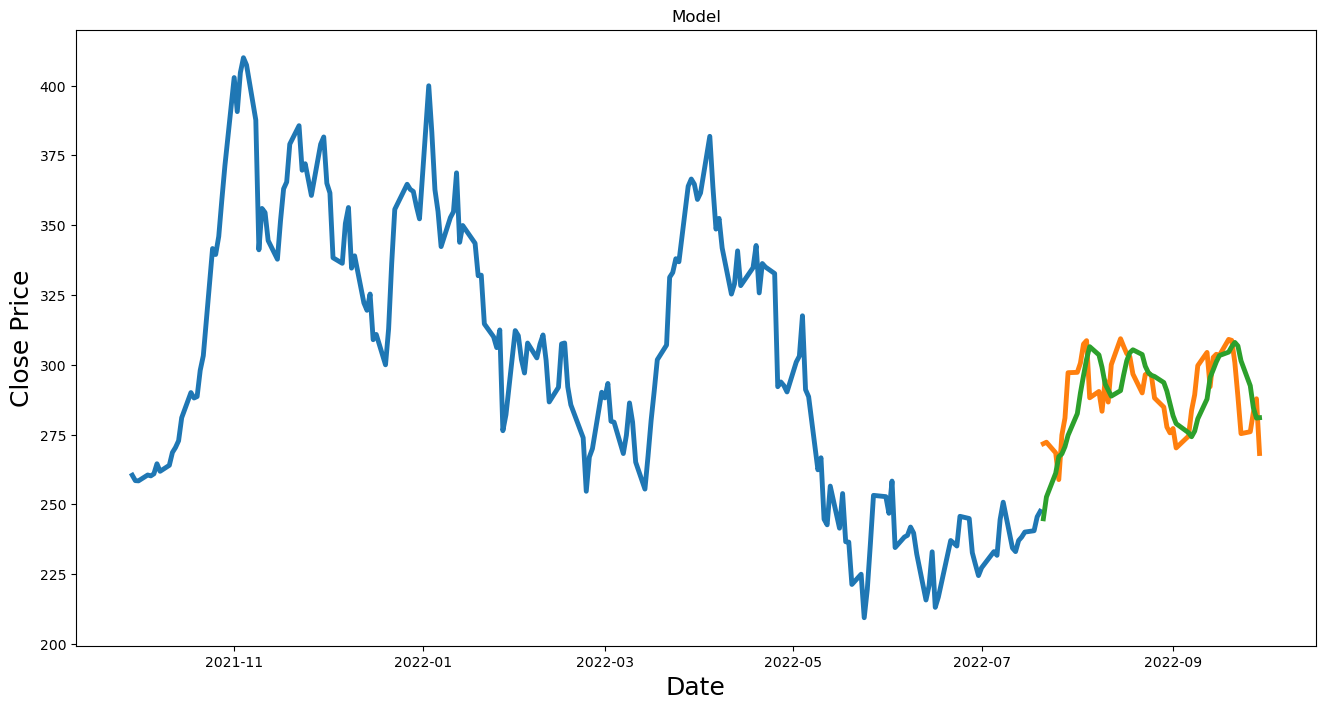

In [34]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visialization the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price' ,fontsize=18)
plt.plot(train['Close'],linewidth=3.5)
plt.plot(valid[['Close','Predictions']],linewidth=3.5)


In [41]:
valid.head(10)

,Close,Predictions
Date,,
2022-07-21,271.706665,244.833801
2022-07-22,272.243347,252.633698
2022-07-25,268.433319,261.163788
2022-07-26,258.859985,267.078766
2022-07-27,274.820007,268.068604
2022-07-28,280.899994,270.681396
2022-07-29,297.149994,274.724487
2022-08-01,297.276672,282.487427
2022-08-02,300.586670,289.859985


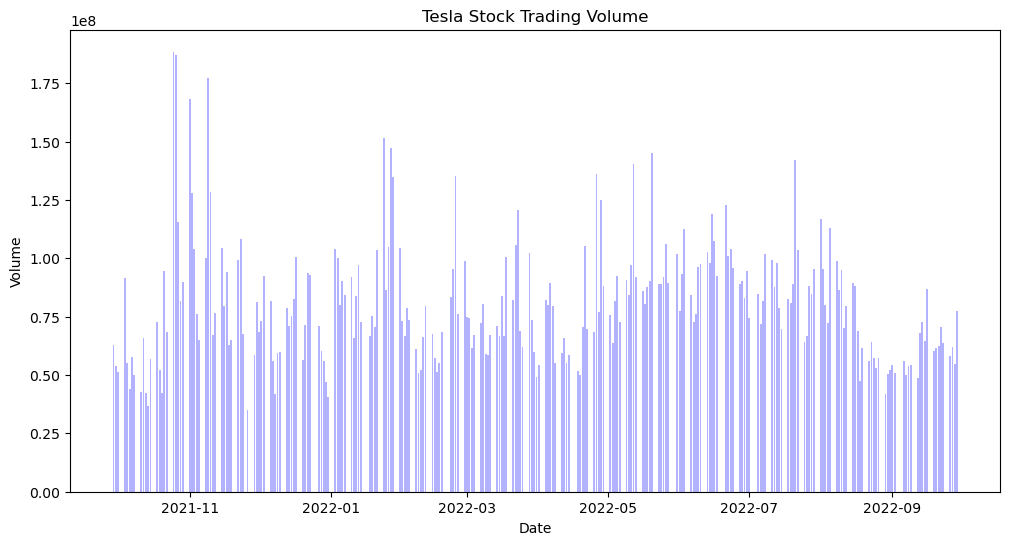

In [37]:
df.index = pd.to_datetime(df.index)
plt.figure(figsize=(12, 6))
plt.bar(df.index, df['Volume'], color='blue', alpha=0.3)
plt.title('Tesla Stock Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

Text(0.5, 1.0, 'Price Correlation Heatmap')

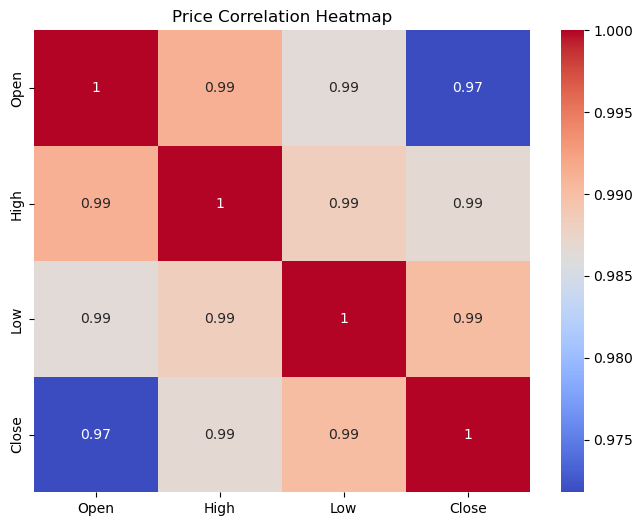

In [39]:
import seaborn as sns
corr_matrix = df[['Open', 'High', 'Low', 'Close']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Price Correlation Heatmap')

Text(0, 0.5, 'Frequency')

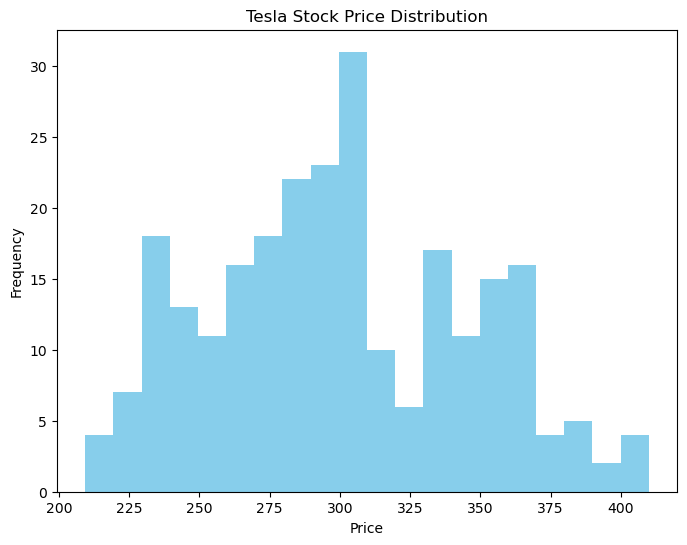

In [40]:
plt.figure(figsize=(8, 6))
plt.hist(df['Close'], bins=20, color='skyblue')
plt.title('Tesla Stock Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')